In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generating Graph

I generate a [Erdos Renyi graph](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) randomly. This graph has 200 nodes and 3011 edges.




In [7]:
G = nx.erdos_renyi_graph(200, 0.15,seed=101)
G.number_of_edges()

3011

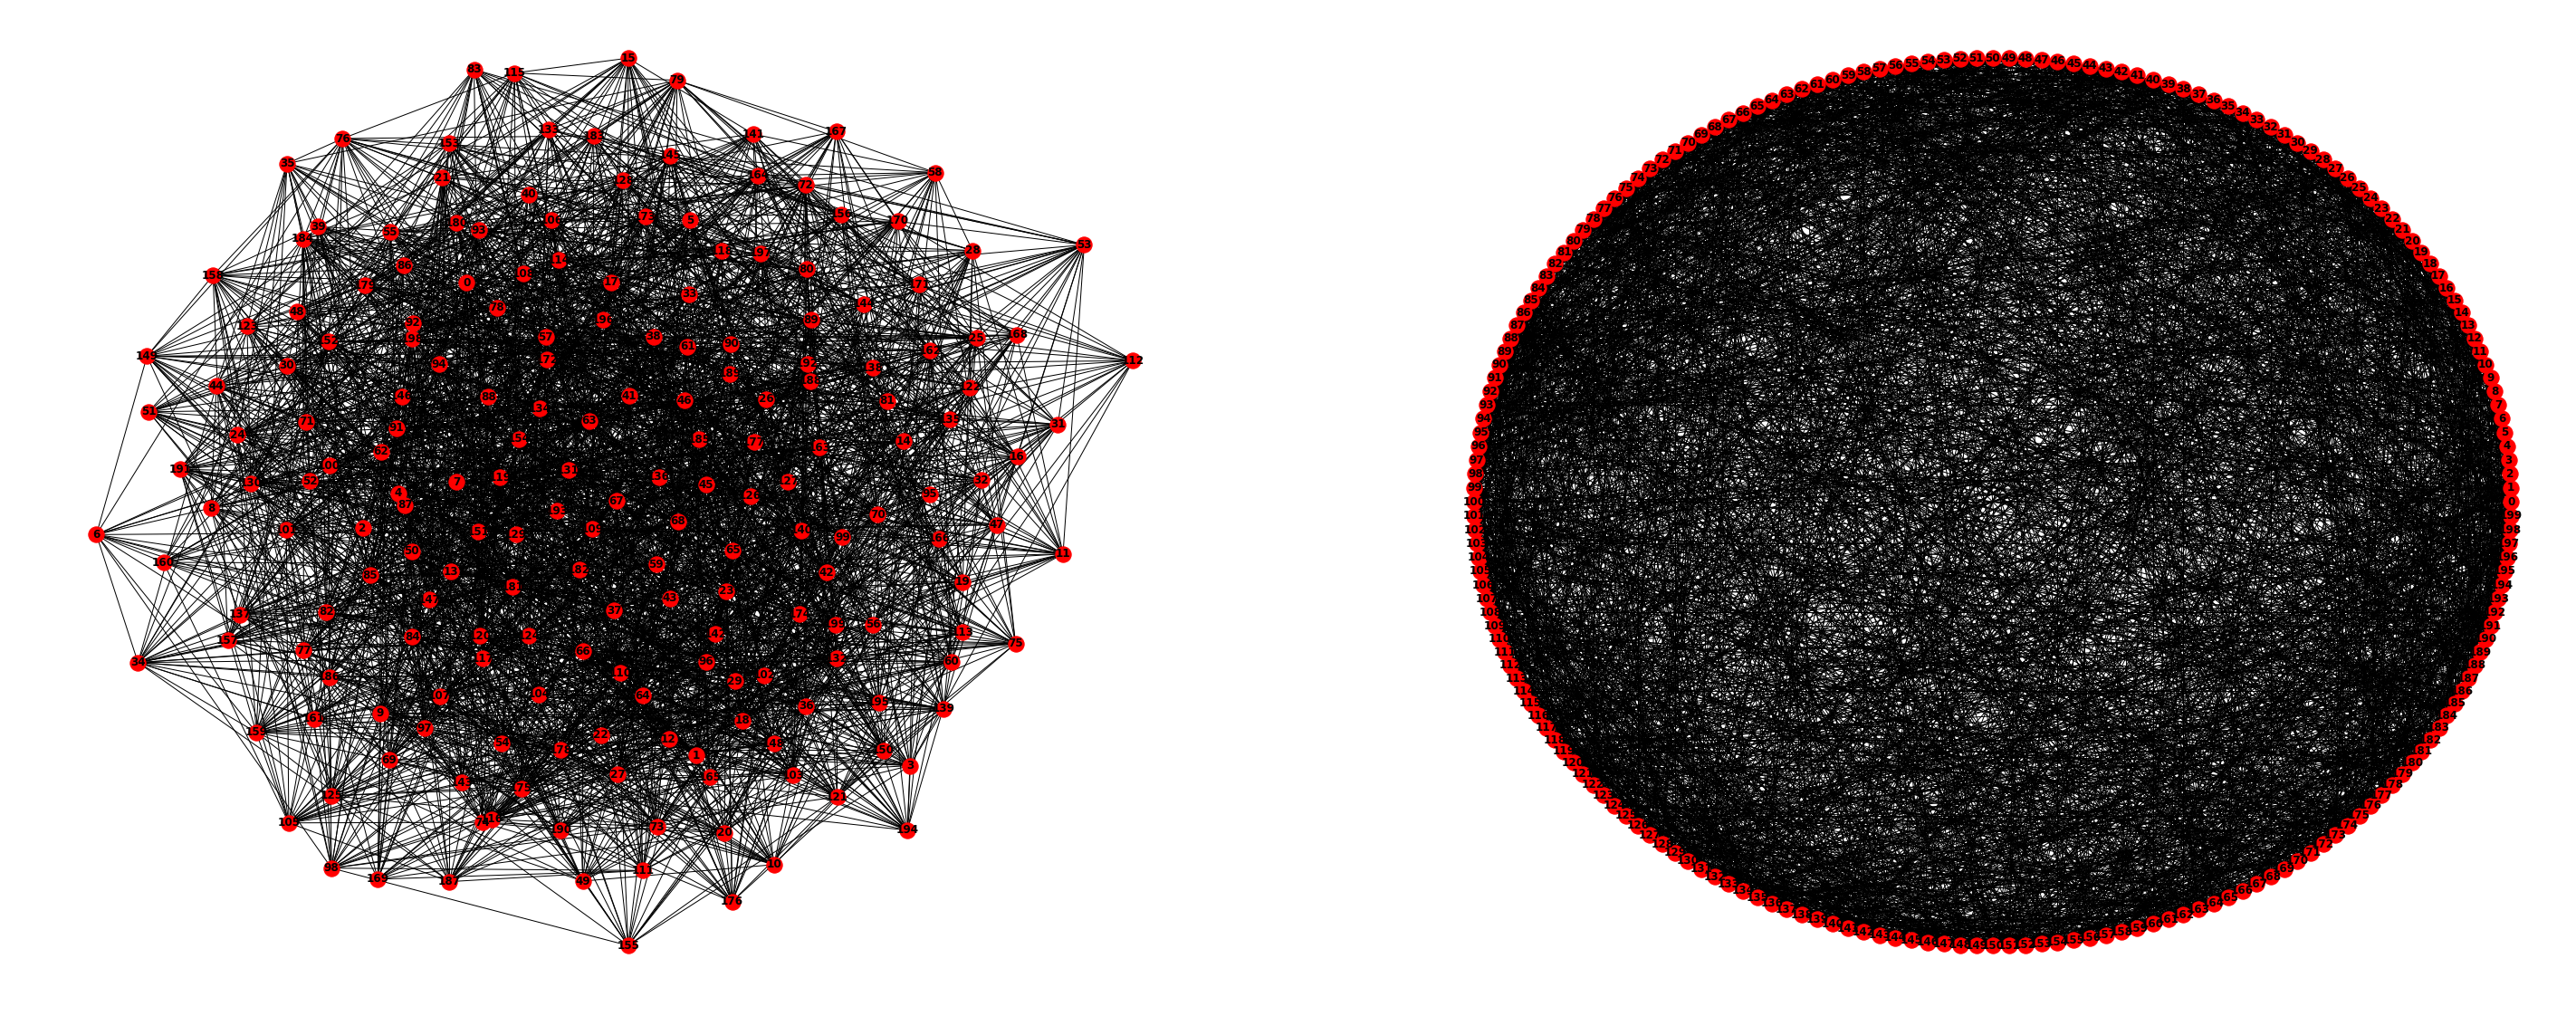

In [8]:
fig, ax = plt.subplots(figsize= (50,20))
plt.subplot(122)
nx.draw_shell(G,with_labels=True, font_weight='bold')
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

# Generate random data

I use these two function to perform the random work and generate data.

In [9]:
#Positive pair
def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
    '''
    number_pairs: numbers of rows will be generated
    seqlen: The length of sequence
    
    It will randomly chose a starting node and perfrom random walk to
    retrieve 50 nodes. Then, the 50 nodes will be seperated to left and
    right side and be stored in paired_dict.
    '''
    paired_data=[]
    if random_seed != None:
        np.random.seed(random_seed)
    for i in range(num_pairs):
        node = np.random.randint(0,200) 
        nodes= [node]
        for j in range(seqlen):
            node =np.random.choice(list(G.adj[node]))
            nodes.append(node)
        splitor = np.random.randint(1,seqlen)
        left = nodes[:splitor+1]
        right = nodes[splitor:]
        paired_dict = {'left':left,'right':right,'target':1}
        paired_data.append(paired_dict)
    return paired_data 

#Negative pair
def CreatingNegativePairs(num_pairs=10, seqlen= 50,prob= 0.1, random_seed=None, num_noise=3):
    '''
    number_pairs: numbers of rows will be generated
    seqlen: The length of sequence
    prob: The probability of adding a noise
    num_noise: The minimum amount of noisy points in a sequence.
    
    It will randomly chose a starting node and perfrom random walk to
    retrieve 50 nodes(may contain noise). Then, the 50 nodes will be 
    seperated to left and right side and be stored in paired_dict.
    '''
    unpaired_data=[]
    if random_seed != None:
        np.random.seed(random_seed)
    while len(unpaired_data) < num_pairs:
        node = np.random.randint(0,200) 
        nodes= [node]
        k=0
        for j in range(seqlen):
            if np.random.rand() < prob:
                k+=1
                NotConnectedNode = [x for x in np.arange(0,200) if x not in list(G.adj[node])]
                node =np.random.choice(NotConnectedNode)
            else:    
                node =np.random.choice(list(G.adj[node]))
            nodes.append(node)
        if k < num_noise:
            continue 
        splitor = np.random.randint(1,seqlen)
        left = nodes[:splitor+1]
        right = nodes[splitor:]
        unpaired_dict = {'left':left,'right':right,'target':0}
        unpaired_data.append(unpaired_dict)
    return unpaired_data 

In [10]:
a = pd.DataFrame(CreatingPositivePairs(1000,random_seed=101))
b = pd.DataFrame(CreatingNegativePairs(1000,random_seed=101))
data = pd.concat([a,b])
pd.DataFrame.to_csv(data,path_or_buf='./data.csv')
data

,left,right,target
0,"[95, 75, 141, 31, 79, 101, 79, 88, 19, 23, 175...","[132, 197, 42, 85, 44, 51, 117, 0]",1
1,"[140, 134, 77, 161, 115, 15, 185, 15, 127, 195...","[15, 127, 116, 110, 83, 57, 41, 49, 43, 171, 4...",1
2,"[196, 128, 44, 109, 40]","[40, 118, 185, 50, 128, 44, 107, 172, 125, 186...",1
3,"[43, 15]","[15, 93, 15, 30, 107, 69, 129, 139, 114, 126, ...",1
4,"[108, 114, 126, 62, 71, 62, 33]","[33, 135, 173, 196, 77, 86, 85, 69, 124, 149, ...",1
5,"[73, 161, 26, 157, 34, 180, 199, 175, 99, 169,...","[141, 31, 173, 192, 59, 40, 76, 21, 141, 62, 9...",1
6,"[22, 160, 91, 40, 59, 148, 66, 179, 99, 159, 1...","[165, 116, 59, 0, 131, 68, 192, 142, 161, 115,...",1
7,"[146, 133, 16, 79, 86, 126, 16]","[16, 190, 16, 118, 135, 179, 172, 119, 158, 14...",1
8,"[92, 91, 48, 145, 65, 16, 19, 190, 111, 196, 9...","[153, 184, 119, 114, 30, 177, 127, 15, 94, 124...",1
9,"[59, 182, 94, 184, 62, 133, 146, 186, 146, 32,...","[108, 165, 155, 16, 133, 156, 162, 19, 162, 10...",1
